# Model: Gradient Boost

### Importing Libraries

In [1]:
import _pickle as pickle
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

### Loading in Data

In [2]:
df = pd.read_excel('../top10_features.xlsx')
df = df.drop(df.columns[0], axis = 1)

### Scaling the Data

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

features_df = df.drop(["Decision"], 1)

scaled_df = pd.DataFrame(scaler.fit_transform(features_df), 
                               index=features_df.index, 
                               columns=features_df.columns)

df = scaled_df.join(df.Decision)

### Splitting the Data

In [4]:
X = df.drop(["Decision"], 1)
y = df.Decision

# Train, test, split
X_train, X_test, y_train, y_test = train_test_split(X, y)

### Helper Functions

#### Function for plotting confusion matrix

In [5]:
def plot_confusion_matrix(y_true, y_pred, labels=["Sell", "Buy", "Hold"], 
                          normalize=False, title=None, cmap=plt.cm.coolwarm):

    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(12,6))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=labels, yticklabels=labels,
           title=title,
           ylabel='ACTUAL',
           xlabel='PREDICTED')
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 1.5
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="snow" if cm[i, j] > thresh else "orange",
                    size=26)
    ax.grid(False)
    fig.tight_layout()
    return ax

## Modeling
The preferred evaluation metric used will be __Precision__ for each class.  They will be optimized using the __F1 Score-Macro-Average__ to balance the Precision and Recall.  This is done because we want to not only be correct when predicting but also make a decent amount of predictions for each class.  Classes such as 'Buy' and 'Sell' are more important than 'Hold'.

### Fitting and Training

In [6]:
# Importing the model
from sklearn.ensemble import GradientBoostingClassifier

# Fitting and training
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

### Printing out Evaluation Metrics

In [7]:
# Classifier predictions
pred = clf.predict(X_test)

#Printing out results
report = classification_report(y_test, pred, target_names=['Sell', 'Buy', 'Hold'])
print(report)

              precision    recall  f1-score   support

        Sell       0.10      0.20      0.13         5
         Buy       0.33      0.22      0.27         9
        Hold       0.00      0.00      0.00         3

    accuracy                           0.18        17
   macro avg       0.14      0.14      0.13        17
weighted avg       0.21      0.18      0.18        17



### Confusion Matrix

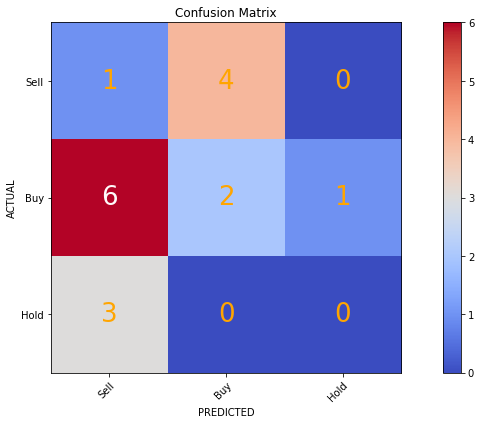

In [8]:
plot_confusion_matrix(y_test, pred, title="Confusion Matrix")
np.set_printoptions(precision=1)
# Plot non-normalized confusion matrix
plt.show()

## Tuning Model Parameters

In [9]:
from sklearn.model_selection import GridSearchCV

### Parameters

In [10]:
# Parameters to Tune
params = {'n_estimators': [50,100, 200],
          'learning_rate': [1,0.1,.01],
          'max_depth': [1, 3, 6],
          'min_samples_split': [2, 5],
          'min_samples_leaf': [1, 3, 5]}

In [11]:
search = GridSearchCV(clf, params, cv=3, return_train_score=True, verbose=5, scoring='f1_macro')


search.fit(X,y)

Fitting 3 folds for each of 162 candidates, totalling 486 fits
[CV] learning_rate=1, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=1, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=(train=1.000, test=0.373), total=   0.2s
[CV] learning_rate=1, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=50 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  learning_rate=1, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=(train=1.000, test=0.505), total=   0.1s
[CV] learning_rate=1, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=1, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=(train=1.000, test=0.319), total=   0.1s
[CV] learning_rate=1, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s


[CV]  learning_rate=1, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=(train=1.000, test=0.263), total=   0.2s
[CV] learning_rate=1, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.6s remaining:    0.0s


[CV]  learning_rate=1, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=(train=1.000, test=0.583), total=   0.4s
[CV] learning_rate=1, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=1, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=(train=1.000, test=0.319), total=   0.3s
[CV] learning_rate=1, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  learning_rate=1, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=(train=1.000, test=0.263), total=   0.7s
[CV] learning_rate=1, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  learning_rate=1, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=(train=1.000, test=0.583), total=   0.5s
[CV] learning_rate=1, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  learning_rate=1, max_depth=1, min_samples_leaf=1, 

[CV]  learning_rate=1, max_depth=1, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=(train=1.000, test=0.374), total=   0.2s
[CV] learning_rate=1, max_depth=1, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=1, max_depth=1, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=(train=1.000, test=0.324), total=   0.1s
[CV] learning_rate=1, max_depth=1, min_samples_leaf=5, min_samples_split=2, n_estimators=200 
[CV]  learning_rate=1, max_depth=1, min_samples_leaf=5, min_samples_split=2, n_estimators=200, score=(train=1.000, test=0.229), total=   0.3s
[CV] learning_rate=1, max_depth=1, min_samples_leaf=5, min_samples_split=2, n_estimators=200 
[CV]  learning_rate=1, max_depth=1, min_samples_leaf=5, min_samples_split=2, n_estimators=200, score=(train=1.000, test=0.341), total=   0.3s
[CV] learning_rate=1, max_depth=1, min_samples_leaf=5, min_samples_split=2, n_estimators=200 
[CV]  learning_rate=1, max_depth=1, min_samples_leaf=5, 

[CV]  learning_rate=1, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=100, score=(train=1.000, test=0.319), total=   0.1s
[CV] learning_rate=1, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=1, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=100, score=(train=1.000, test=0.457), total=   0.1s
[CV] learning_rate=1, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=1, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=100, score=(train=1.000, test=0.295), total=   0.1s
[CV] learning_rate=1, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=200 
[CV]  learning_rate=1, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=200, score=(train=1.000, test=0.222), total=   0.3s
[CV] learning_rate=1, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=200 
[CV]  learning_rate=1, max_depth=3, min_samples_leaf=3, 

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=1, max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=200, score=(train=1.000, test=0.392), total=   0.3s
[CV] learning_rate=1, max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=200 
[CV]  learning_rate=1, max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=200, score=(train=1.000, test=0.259), total=   0.2s
[CV] learning_rate=1, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=1, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=50, score=(train=1.000, test=0.395), total=   0.1s
[CV] learning_rate=1, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=1, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=50, score=(train=1.000, test=0.489), total=   0.1s
[CV] learning_rate=1, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=1, max_depth=3, min_samples_leaf=5, min_s

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=1, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=200, score=(train=1.000, test=0.250), total=   0.3s
[CV] learning_rate=1, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=200 
[CV]  learning_rate=1, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=200, score=(train=1.000, test=0.274), total=   0.3s
[CV] learning_rate=1, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=200 
[CV]  learning_rate=1, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=200, score=(train=1.000, test=0.444), total=   0.3s
[CV] learning_rate=1, max_depth=3, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=1, max_depth=3, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=(train=1.000, test=0.323), total=   0.4s
[CV] learning_rate=1, max_depth=3, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=1, max_depth=3, min_samples_leaf=5, min

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=1, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=100, score=(train=1.000, test=0.286), total=   0.2s
[CV] learning_rate=1, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=1, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=100, score=(train=1.000, test=0.359), total=   0.2s
[CV] learning_rate=1, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=200 
[CV]  learning_rate=1, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=200, score=(train=1.000, test=0.345), total=   0.4s
[CV] learning_rate=1, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=200 
[CV]  learning_rate=1, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=200, score=(train=1.000, test=0.413), total=   0.4s
[CV] learning_rate=1, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=200 
[CV]  learning_rate=1, max_depth=6, min_samples_leaf=3, 

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=1, max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=200, score=(train=1.000, test=0.452), total=   0.4s
[CV] learning_rate=1, max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=200 
[CV]  learning_rate=1, max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=200, score=(train=1.000, test=0.251), total=   0.4s
[CV] learning_rate=1, max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=1, max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=50, score=(train=1.000, test=0.370), total=   0.1s
[CV] learning_rate=1, max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=1, max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=50, score=(train=1.000, test=0.392), total=   0.2s
[CV] learning_rate=1, max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=1, max_depth=6, min_samples_leaf=5, min_s

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=1, max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=200, score=(train=1.000, test=0.310), total=   0.2s
[CV] learning_rate=1, max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=200 
[CV]  learning_rate=1, max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=200, score=(train=1.000, test=0.400), total=   0.2s
[CV] learning_rate=1, max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=1, max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=(train=1.000, test=0.317), total=   0.1s
[CV] learning_rate=1, max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=1, max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=(train=1.000, test=0.361), total=   0.1s
[CV] learning_rate=1, max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=50 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=1, max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=(train=1.000, test=0.369), total=   0.1s
[CV] learning_rate=1, max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=1, max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=(train=1.000, test=0.314), total=   0.1s
[CV] learning_rate=1, max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=1, max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=(train=1.000, test=0.386), total=   0.1s
[CV] learning_rate=1, max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=1, max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=(train=1.000, test=0.307), total=   0.1s
[CV] learning_rate=1, max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=200 
[CV]  learning_rate=1, max_depth=6, min_samples_leaf=5, m

[CV]  learning_rate=0.1, max_depth=1, min_samples_leaf=3, min_samples_split=5, n_estimators=50, score=(train=0.913, test=0.273), total=   0.1s
[CV] learning_rate=0.1, max_depth=1, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.1, max_depth=1, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=(train=1.000, test=0.196), total=   0.1s
[CV] learning_rate=0.1, max_depth=1, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.1, max_depth=1, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=(train=1.000, test=0.493), total=   0.2s
[CV] learning_rate=0.1, max_depth=1, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.1, max_depth=1, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=(train=0.982, test=0.273), total=   0.2s
[CV] learning_rate=0.1, max_depth=1, min_samples_leaf=3, min_samples_split=5, n_estimators=200 
[CV]  learning_rate=0.1, max_depth=1, min

[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=(train=1.000, test=0.275), total=   0.1s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=(train=1.000, test=0.361), total=   0.2s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=(train=1.000, test=0.222), total=   0.3s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=(train=1.000, test=0.566), total=   0.3s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.1, max_depth=3, min_s

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=50, score=(train=1.000, test=0.527), total=   0.2s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=50, score=(train=1.000, test=0.404), total=   0.2s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=(train=1.000, test=0.217), total=   0.2s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=(train=1.000, test=0.527), total=   0.2s
[CV] learning_rate=0.1, max_depth=3, min_sa

[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=(train=1.000, test=0.344), total=   0.6s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=(train=1.000, test=0.250), total=   0.2s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=(train=1.000, test=0.427), total=   0.2s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=(train=1.000, test=0.328), total=   0.2s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.1, max_depth=6, min_samp

[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=200, score=(train=1.000, test=0.542), total=   0.4s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=200 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=200, score=(train=1.000, test=0.341), total=   0.5s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=(train=1.000, test=0.232), total=   0.2s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=(train=1.000, test=0.453), total=   0.3s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.1, max_depth=6, min_sam

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

[CV]  learning_rate=0.01, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=(train=0.509, test=0.242), total=   0.1s
[CV] learning_rate=0.01, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=50 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=0.01, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=(train=0.461, test=0.190), total=   0.2s
[CV] learning_rate=0.01, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=(train=0.601, test=0.262), total=   0.2s
[CV] learning_rate=0.01, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=0.01, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=(train=0.542, test=0.261), total=   0.2s
[CV] learning_rate=0.01, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=(train=0.618, test=0.256), total=   0.2s
[CV] learning_rate=0.01, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=0.01, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=(train=0.652, test=0.262), total=   0.6s
[CV] learning_rate=0.01, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=0.01, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=(train=0.781, test=0.318), total=   0.4s
[CV] learning_rate=0.01, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  learning_rate=0.01, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=(train=0.816, test=0.205), total=   0.3s
[CV] learning_rate=0.01, max_depth=1, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.01, max_depth=1, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=(train=0.467, test=0.212), total=   0.1s
[CV] learning_rate=0.01, max_depth=1, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.01, max_depth=1, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=(train=0.509, test=0.242), total=   0.1s
[CV] learning_rate=0.01, max_depth=1, min_samples_leaf=1, min_samples_split=5, n_estimators=50 

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio


[CV]  learning_rate=0.01, max_depth=1, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=(train=0.461, test=0.190), total=   0.1s
[CV] learning_rate=0.01, max_depth=1, min_samples_leaf=1, min_samples_split=5, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=0.01, max_depth=1, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=(train=0.601, test=0.262), total=   0.2s
[CV] learning_rate=0.01, max_depth=1, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=1, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=(train=0.542, test=0.261), total=   0.1s
[CV] learning_rate=0.01, max_depth=1, min_samples_leaf=1, min_samples_split=5, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=0.01, max_depth=1, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=(train=0.618, test=0.256), total=   0.2s
[CV] learning_rate=0.01, max_depth=1, min_samples_leaf=1, min_samples_split=5, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=0.01, max_depth=1, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=(train=0.652, test=0.262), total=   0.3s
[CV] learning_rate=0.01, max_depth=1, min_samples_leaf=1, min_samples_split=5, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=0.01, max_depth=1, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=(train=0.781, test=0.318), total=   0.7s
[CV] learning_rate=0.01, max_depth=1, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  learning_rate=0.01, max_depth=1, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=(train=0.816, test=0.205), total=   0.8s
[CV] learning_rate=0.01, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=50 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

[CV]  learning_rate=0.01, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=50, score=(train=0.467, test=0.212), total=   0.2s
[CV] learning_rate=0.01, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.01, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=50, score=(train=0.509, test=0.242), total=   0.1s
[CV] learning_rate=0.01, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=50 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=0.01, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=50, score=(train=0.461, test=0.190), total=   0.2s
[CV] learning_rate=0.01, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=0.01, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=100, score=(train=0.500, test=0.212), total=   0.2s
[CV] learning_rate=0.01, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=0.01, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=100, score=(train=0.542, test=0.261), total=   0.2s
[CV] learning_rate=0.01, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=0.01, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=100, score=(train=0.618, test=0.256), total=   0.3s
[CV] learning_rate=0.01, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=0.01, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=200, score=(train=0.651, test=0.212), total=   0.5s
[CV] learning_rate=0.01, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=0.01, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=200, score=(train=0.781, test=0.318), total=   0.8s
[CV] learning_rate=0.01, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=200 
[CV]  learning_rate=0.01, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=200, score=(train=0.816, test=0.205), total=   0.9s
[CV] learning_rate=0.01, max_depth=1, min_samples_leaf=3, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.01, max_depth=1, min_samples_leaf=3, min_samples_split=5, n_estimators=50, score=(train=0.467, test=0.212), total=   0.2s
[CV] learning_rate=0.01, max_depth=1, min_samples_leaf=3, min_samples_split=5, n_estimators=50 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

[CV]  learning_rate=0.01, max_depth=1, min_samples_leaf=3, min_samples_split=5, n_estimators=50, score=(train=0.509, test=0.242), total=   0.3s
[CV] learning_rate=0.01, max_depth=1, min_samples_leaf=3, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.01, max_depth=1, min_samples_leaf=3, min_samples_split=5, n_estimators=50, score=(train=0.461, test=0.190), total=   0.1s
[CV] learning_rate=0.01, max_depth=1, min_samples_leaf=3, min_samples_split=5, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=0.01, max_depth=1, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=(train=0.500, test=0.212), total=   0.3s
[CV] learning_rate=0.01, max_depth=1, min_samples_leaf=3, min_samples_split=5, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=0.01, max_depth=1, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=(train=0.542, test=0.261), total=   0.3s
[CV] learning_rate=0.01, max_depth=1, min_samples_leaf=3, min_samples_split=5, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=0.01, max_depth=1, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=(train=0.618, test=0.256), total=   0.3s
[CV] learning_rate=0.01, max_depth=1, min_samples_leaf=3, min_samples_split=5, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=0.01, max_depth=1, min_samples_leaf=3, min_samples_split=5, n_estimators=200, score=(train=0.651, test=0.212), total=   0.4s
[CV] learning_rate=0.01, max_depth=1, min_samples_leaf=3, min_samples_split=5, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=0.01, max_depth=1, min_samples_leaf=3, min_samples_split=5, n_estimators=200, score=(train=0.781, test=0.318), total=   1.1s
[CV] learning_rate=0.01, max_depth=1, min_samples_leaf=3, min_samples_split=5, n_estimators=200 
[CV]  learning_rate=0.01, max_depth=1, min_samples_leaf=3, min_samples_split=5, n_estimators=200, score=(train=0.816, test=0.205), total=   0.4s
[CV] learning_rate=0.01, max_depth=1, min_samples_leaf=5, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.01, max_depth=1, min_samples_leaf=5, min_samples_split=2, n_estimators=50, score=(train=0.467, test=0.212), total=   0.1s
[CV] learning_rate=0.01, max_depth=1, min_samples_leaf=5, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.01, max_depth=1, min_samples_leaf=5, min_samples_split=2, n_estimators=50, score=(train=0.527, test=0.282), total=   0.1s
[CV] learning_rate=0.01, max_depth=1, min_samples_leaf=5, min_samples_split=2, n_estimators=50 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

[CV]  learning_rate=0.01, max_depth=1, min_samples_leaf=5, min_samples_split=2, n_estimators=50, score=(train=0.459, test=0.173), total=   0.1s
[CV] learning_rate=0.01, max_depth=1, min_samples_leaf=5, min_samples_split=2, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=0.01, max_depth=1, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=(train=0.500, test=0.212), total=   0.2s
[CV] learning_rate=0.01, max_depth=1, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=1, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=(train=0.525, test=0.262), total=   0.1s
[CV] learning_rate=0.01, max_depth=1, min_samples_leaf=5, min_samples_split=2, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=0.01, max_depth=1, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=(train=0.586, test=0.256), total=   0.2s
[CV] learning_rate=0.01, max_depth=1, min_samples_leaf=5, min_samples_split=2, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=0.01, max_depth=1, min_samples_leaf=5, min_samples_split=2, n_estimators=200, score=(train=0.651, test=0.212), total=   0.4s
[CV] learning_rate=0.01, max_depth=1, min_samples_leaf=5, min_samples_split=2, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=0.01, max_depth=1, min_samples_leaf=5, min_samples_split=2, n_estimators=200, score=(train=0.798, test=0.317), total=   1.0s
[CV] learning_rate=0.01, max_depth=1, min_samples_leaf=5, min_samples_split=2, n_estimators=200 
[CV]  learning_rate=0.01, max_depth=1, min_samples_leaf=5, min_samples_split=2, n_estimators=200, score=(train=0.824, test=0.359), total=   0.6s
[CV] learning_rate=0.01, max_depth=1, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.01, max_depth=1, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=(train=0.467, test=0.212), total=   0.1s
[CV] learning_rate=0.01, max_depth=1, min_samples_leaf=5, min_samples_split=5, n_estimators=50 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

[CV]  learning_rate=0.01, max_depth=1, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=(train=0.527, test=0.282), total=   0.1s
[CV] learning_rate=0.01, max_depth=1, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.01, max_depth=1, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=(train=0.459, test=0.173), total=   0.1s
[CV] learning_rate=0.01, max_depth=1, min_samples_leaf=5, min_samples_split=5, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

[CV]  learning_rate=0.01, max_depth=1, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=(train=0.500, test=0.212), total=   0.3s
[CV] learning_rate=0.01, max_depth=1, min_samples_leaf=5, min_samples_split=5, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=0.01, max_depth=1, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=(train=0.525, test=0.262), total=   0.3s
[CV] learning_rate=0.01, max_depth=1, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=1, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=(train=0.586, test=0.256), total=   0.1s
[CV] learning_rate=0.01, max_depth=1, min_samples_leaf=5, min_samples_split=5, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=0.01, max_depth=1, min_samples_leaf=5, min_samples_split=5, n_estimators=200, score=(train=0.651, test=0.212), total=   0.3s
[CV] learning_rate=0.01, max_depth=1, min_samples_leaf=5, min_samples_split=5, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=0.01, max_depth=1, min_samples_leaf=5, min_samples_split=5, n_estimators=200, score=(train=0.798, test=0.317), total=   0.3s
[CV] learning_rate=0.01, max_depth=1, min_samples_leaf=5, min_samples_split=5, n_estimators=200 
[CV]  learning_rate=0.01, max_depth=1, min_samples_leaf=5, min_samples_split=5, n_estimators=200, score=(train=0.824, test=0.359), total=   0.3s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=(train=0.916, test=0.250), total=   0.1s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=(train=0.927, test=0.341), total=   0.2s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=(train=0.982, test=0.307), total=   0.1s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=(train=0.961, test=0.278), total=   0.2s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=(train=1.000, test=0.290), total=   0.2s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=(train=0.982, test=0.490), total=   0.2s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=(train=1.000, test=0.284), total=   0.4s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  learning_rate=0.01, max_de

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=(train=0.927, test=0.341), total=   0.1s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=(train=0.948, test=0.337), total=   0.1s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=(train=0.916, test=0.278), total=   0.2s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=(train=1.000, test=0.290), total=   0.2s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=(train=1.000, test=0.348), total=   0.3s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=(train=1.000, test=0.278), total=   0.4s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=(train=1.000, test=0.270), total=   0.4s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=(train=1.000, test=0.490), total=   0.4s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=50, score=(train=0.845, test=0.212), total=   0.1s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=50 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=50, score=(train=0.832, test=0.262), total=   0.1s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=50, score=(train=0.875, test=0.265), total=   0.1s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=100, score=(train=0.916, test=0.323), total=   0.2s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=100, score=(train=1.000, test=0.222), total=   0.2s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.01, max_depth

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=50, score=(train=0.845, test=0.212), total=   0.3s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=50 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=50, score=(train=0.832, test=0.262), total=   0.4s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=50, score=(train=0.875, test=0.265), total=   0.1s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=(train=0.916, test=0.323), total=   0.7s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=(train=1.000, test=0.222), total=   0.3s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.01, max_depth

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=50, score=(train=0.893, test=0.308), total=   0.1s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=(train=0.898, test=0.221), total=   0.2s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=(train=0.911, test=0.290), total=   0.2s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=(train=0.948, test=0.404), total=   0.2s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=200 
[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=200, score=(train=1.000, test=0.395), total=   0.5s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=200 
[CV]  learning_rate=0.01, max_de

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=(train=0.893, test=0.215), total=   0.1s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=(train=0.893, test=0.308), total=   0.1s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=5, min_samples_split=5, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=(train=0.898, test=0.221), total=   0.2s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=(train=0.911, test=0.290), total=   0.2s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=(train=0.948, test=0.404), total=   0.2s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=5, min_samples_split=5, n_estimators=200 
[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=5, min_samples_split=5, n_estimators=200, score=(train=1.000, test=0.395), total=   0.4s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=5, min_samples_split=5, n_estimators=200 
[CV]  learning_rate=0.01, max_de

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=0.01, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=50, score=(train=0.863, test=0.213), total=   0.2s
[CV] learning_rate=0.01, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=50 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=0.01, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=50, score=(train=0.883, test=0.317), total=   0.2s
[CV] learning_rate=0.01, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.01, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=50, score=(train=0.927, test=0.263), total=   0.2s
[CV] learning_rate=0.01, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=100, score=(train=1.000, test=0.351), total=   0.4s
[CV] learning_rate=0.01, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=0.01, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=100, score=(train=1.000, test=0.262), total=   0.4s
[CV] learning_rate=0.01, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=100, score=(train=1.000, test=0.361), total=   0.3s
[CV] learning_rate=0.01, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=200 
[CV]  learning_rate=0.01, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=200, score=(train=1.000, test=0.299), total=   0.6s
[CV] learning_rate=0.01, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=200 
[CV]  learning_rate=0.01, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=200, score=(train=1.000, test=0.230), total=   0.6s
[CV] learning_rate=0.01, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=200 
[CV]  learning_rate=0.01, max_de

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=0.01, max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=50, score=(train=0.863, test=0.213), total=   0.3s
[CV] learning_rate=0.01, max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=50 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=0.01, max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=50, score=(train=0.883, test=0.317), total=   0.2s
[CV] learning_rate=0.01, max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.01, max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=50, score=(train=0.927, test=0.263), total=   0.4s
[CV] learning_rate=0.01, max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=(train=1.000, test=0.351), total=   0.4s
[CV] learning_rate=0.01, max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=0.01, max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=(train=1.000, test=0.262), total=   0.5s
[CV] learning_rate=0.01, max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=(train=1.000, test=0.361), total=   0.4s
[CV] learning_rate=0.01, max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=200 
[CV]  learning_rate=0.01, max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=200, score=(train=1.000, test=0.299), total=   0.6s
[CV] learning_rate=0.01, max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=200 
[CV]  learning_rate=0.01, max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=200, score=(train=1.000, test=0.294), total=   1.0s
[CV] learning_rate=0.01, max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=200 
[CV]  learning_rate=0.01, max_de

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=0.01, max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=50, score=(train=0.893, test=0.215), total=   0.2s
[CV] learning_rate=0.01, max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.01, max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=50, score=(train=0.867, test=0.276), total=   0.2s
[CV] learning_rate=0.01, max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=0.01, max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=(train=0.916, test=0.221), total=   0.3s
[CV] learning_rate=0.01, max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=(train=0.928, test=0.290), total=   0.2s
[CV] learning_rate=0.01, max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=(train=0.948, test=0.290), total=   0.3s
[CV] learning_rate=0.01, max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=200 
[CV]  learning_rate=0.01, max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=200, score=(train=1.000, test=0.256), total=   0.8s
[CV] learning_rate=0.01, max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=200 
[CV]  learning_rate=0.01, max_de

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=0.01, max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=(train=0.893, test=0.215), total=   0.1s
[CV] learning_rate=0.01, max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.01, max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=(train=0.910, test=0.276), total=   0.1s
[CV] learning_rate=0.01, max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=0.01, max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=(train=0.916, test=0.221), total=   0.3s
[CV] learning_rate=0.01, max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=(train=0.928, test=0.290), total=   0.4s
[CV] learning_rate=0.01, max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=(train=0.948, test=0.290), total=   0.3s
[CV] learning_rate=0.01, max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=200 
[CV]  learning_rate=0.01, max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=200, score=(train=1.000, test=0.256), total=   0.5s
[CV] learning_rate=0.01, max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=200 
[CV]  learning_rate=0.01, max_de

[Parallel(n_jobs=1)]: Done 486 out of 486 | elapsed:  2.4min finished
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no...
                                                  presort='auto',
  

### Tuned Results

In [12]:
print("Mean Training Score:", np.mean(search.cv_results_['mean_train_score']))
print("Mean Testing Score:", search.score(X, y))
print("\nBest Parameter Found:")
search.best_params_

Mean Training Score: 0.9411612615080922
Mean Testing Score: 1.0

Best Parameter Found:


{'learning_rate': 1,
 'max_depth': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 50}

### Model with the Best Parameters

In [13]:
search_clf = search.best_estimator_

search_clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None, learning_rate=1,
                           loss='deviance', max_depth=3, max_features=None,
                           max_leaf_nodes=None, min_impurity_decrease=0.0,
                           min_impurity_split=None, min_samples_leaf=3,
                           min_samples_split=5, min_weight_fraction_leaf=0.0,
                           n_estimators=50, n_iter_no_change=None,
                           presort='auto', random_state=None, subsample=1.0,
                           tol=0.0001, validation_fraction=0.1, verbose=0,
                           warm_start=False)

#### Results from Optimum Parameters

In [14]:
# Classifier predictions
s_pred = search_clf.predict(X_test)

#Printing out results
report = classification_report(y_test, s_pred, target_names=['Sell', 'Buy', 'Hold'])
print(report)

              precision    recall  f1-score   support

        Sell       0.14      0.20      0.17         5
         Buy       0.38      0.33      0.35         9
        Hold       0.00      0.00      0.00         3

    accuracy                           0.24        17
   macro avg       0.17      0.18      0.17        17
weighted avg       0.24      0.24      0.24        17



### Confusion Matrix for Optimum Parameters

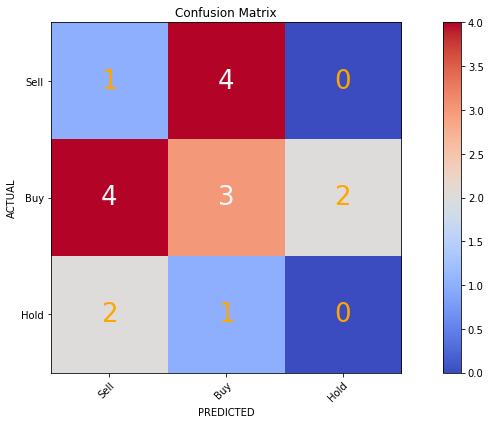

In [15]:
plot_confusion_matrix(y_test, s_pred, title="Confusion Matrix")
np.set_printoptions(precision=1)
# Plot non-normalized confusion matrix
plt.show()